# EDA IBM stock 1min ticks

## Main takeouts (december 29/2019)
* The distribution of the difference of the time series has very long tails: see plot.
* Created a very clean dataset with 'pastValues', 'currentValue', 'futureValue', 'deltaMinutes'. 

## To do
* Wrap the code that produced the data set into a 
* Create a target from the created dataset: decisions need to be made
* Start making simple regressions from the dataframe described.
* Need a more elaborated way of looking at histograms: the tails don't let me see anything: those tails are, of course a matter of huge concern.

In [30]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/MyProjects/moneyManager


In [32]:
import pandas as pd
from datetime import datetime

In [33]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday/IBM_adjusted.txt', header=None, names=names)
df['DateTime'] = df.Date+' '+df.Time
df.DateTime = pd.to_datetime(df.DateTime,infer_datetime_format=True) 

In [34]:
ds = df[['DateTime', 'Open']].copy()

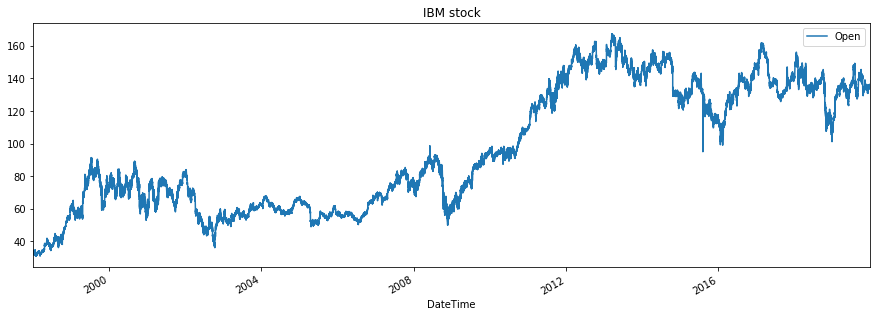

In [35]:
ds.set_index('DateTime').plot(figsize=(15,5), title='IBM stock');

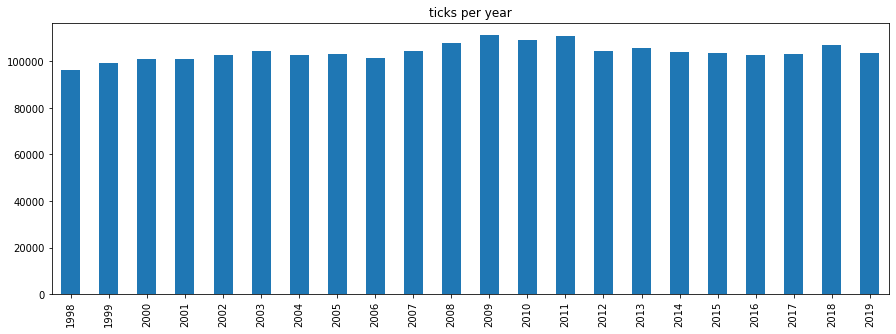

In [36]:
ds.DateTime.apply(lambda x: x.year).value_counts().sort_index().plot.bar(figsize=(15, 5), title='ticks per year');

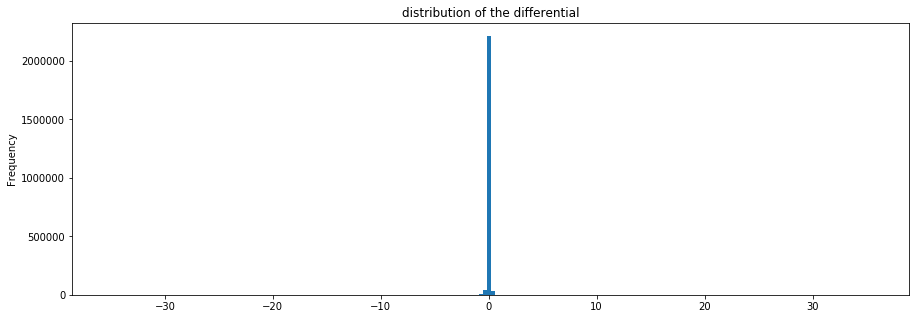

In [37]:
ds.Open.diff().plot.hist(bins=200, figsize=(15,5), title= 'distribution of the differential');

In [38]:
windowSize = 5
dsPast = pd.concat([ds.Open.shift(i) for i in range(windowSize, 0, -1)], axis=1).apply(lambda x: list(x), axis=1)
dsPresent = ds.Open
dsFuture = pd.concat([ds.Open.shift(i) for i in range(-1, -windowSize-1, -1)], axis=1).apply(lambda x: list(x), axis=1)
deltaMinutes = (ds.DateTime.shift(-windowSize) - ds.DateTime.shift(windowSize)).apply(lambda x: x.seconds)//60

In [39]:
dg = pd.concat([ds.DateTime, dsPast, dsPresent, dsFuture, deltaMinutes], axis=1)
dg.columns = ['DateTime', 'pastValues', 'currentValue', 'futureValue', 'deltaMinutes']
dg = dg.set_index('DateTime')

In [40]:
dg.columns

Index(['pastValues', 'currentValue', 'futureValue', 'deltaMinutes'], dtype='object')

In [41]:
dg[1:40]

,pastValues,currentValue,futureValue,deltaMinutes
DateTime,,,,
1998-01-02 09:31:00,"[nan, nan, nan, nan, 33.69]",33.65,"[33.67, 33.67, 33.65, 33.67, 33.67]",NaN
1998-01-02 09:32:00,"[nan, nan, nan, 33.69, 33.65]",33.67,"[33.67, 33.65, 33.67, 33.67, 33.65]",NaN
1998-01-02 09:33:00,"[nan, nan, 33.69, 33.65, 33.67]",33.67,"[33.65, 33.67, 33.67, 33.65, 33.65]",NaN
1998-01-02 09:34:00,"[nan, 33.69, 33.65, 33.67, 33.67]",33.65,"[33.67, 33.67, 33.65, 33.65, 33.65]",NaN
1998-01-02 09:35:00,"[33.69, 33.65, 33.67, 33.67, 33.65]",33.67,"[33.67, 33.65, 33.65, 33.65, 33.67]",10.0
1998-01-02 09:36:00,"[33.65, 33.67, 33.67, 33.65, 33.67]",33.67,"[33.65, 33.65, 33.65, 33.67, 33.69]",10.0
1998-01-02 09:37:00,"[33.67, 33.67, 33.65, 33.67, 33.67]",33.65,"[33.65, 33.65, 33.67, 33.69, 33.73]",10.0
1998-01-02 09:38:00,"[33.67, 33.65, 33.67, 33.67, 33.65]",33.65,"[33.65, 33.67, 33.69, 33.73, 33.69]",10.0
1998-01-02 09:39:00,"[33.65, 33.67, 33.67, 33.65, 33.65]",33.65,"[33.67, 33.69, 33.73, 33.69, 33.77]",10.0
